## King County Housing Project
* Student name: Deanna Gould
* Flex Student
* Instructor name: Morgan Jones


July 14

## Introduction


The purpose of this project is to create a multiple linear regression model that can accurately predict the sale price of houses in King County, Washington, where Seattle is the largest city. The contributing dataset for this model can be found *here*. 

## Business Problem

A real estate investment firm is considering investing in real estate in King County, and they want to understand the value of homes based on their features, so they know which would be best to invest in and renovate for the best sale price possible. To do that, this notebook will: 

* Find the most highly correlated features to price
* Find any independent features that are too highly correlated to each other (multicollinearity)
* Create a reproducable regression model that best predicts housing prices

Below are the provided fields and their definitions, which we will only use some of:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

* Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/).

The first few steps will be understanding the data, cleaning the data, checking for multicollinearity, and iterating through models to get the most significant P-values and the best R-squared values, which will produce the most accurate model. The performance of the model can be measured by the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared, and Adjusted R-squared. I'll then make recommendations to the stakeholder based on what features I find most important to increasing home prices, or which homes are the best investment. 

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [3]:
# Creating the DataFrame for the KC Housing Data

df = pd.read_csv('data/kc_house_data.csv', index_col=0)

In [4]:
# Looking at what the first few rows and columns of the housing data looks like

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [5]:
# Checking the size of the DataFrame

df.shape

(30155, 24)

In [6]:
# Checking the datatypes in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

In [7]:
# Checking which columns may contain null values

df.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source       True
sewer_system      True
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

The heat_source and sewer_system columns have some null values, and I'm not sure how necessary that will be in my analysis, but regardless of that, I'm going to check how many null values are in the column before I remove rows with null values.

In [8]:
# Getting a sum of the null values in each column

df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [9]:
# Creating a copy of the DataFrame so I can compare to the original df I imported without restarting the notebook

kc = df.copy()

In [10]:
# Finding the datatypes of the columns and starting to think about numerical vs categorical columns

kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

In [11]:
# Looking at the number of unique values in each field

kc.nunique()

date               365
price             5202
bedrooms            13
bathrooms           21
sqft_living       1318
sqft_lot         12237
floors               7
waterfront           2
greenbelt            2
nuisance             2
view                 5
condition            5
grade               13
heat_source          7
sewer_system         4
sqft_above        1187
sqft_basement      459
sqft_garage        412
sqft_patio         526
yr_built           123
yr_renovated        83
address          29560
lat              24354
long             24084
dtype: int64

### Some Data Exploration

As seen above, there is still a right skew, but it is a more normal distribution.

In [12]:
# Finding the shape of the dataframe to see how many rows and columns there are

kc.shape

(30155, 24)

In [13]:
# Checking again how many null values there are in each column of the kc DataFrame

kc.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [14]:
# Dropping null values

kc.dropna(inplace=True)

In [15]:
# Double checking that the null values were dropped

kc.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source      False
sewer_system     False
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

Great! All of the null values have been dropped. Now I'm going to create a DataFrame for the numeric independent variables.

In [16]:
# Creating a DataFrame for independent variables based on correlation and their absolute values

X_corr = kc.corr().abs()
X_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
price,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,0.022278
bedrooms,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,0.106791
bathrooms,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,0.005481,0.017684
sqft_living,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,0.087625
sqft_lot,0.086550,0.006215,0.038028,0.122271,1.000000,0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,0.034408
floors,0.180589,0.146871,0.404291,0.303911,0.031555,1.000000,0.448245,0.248466,0.132363,0.125016,0.544314,0.025041,0.218174,0.233589
sqft_above,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,0.082722
sqft_basement,0.245005,0.237957,0.260684,0.338387,0.004457,0.248466,0.067306,1.000000,0.025766,0.210305,0.230783,0.054032,0.059664,0.045104
sqft_garage,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,0.098301,0.092092,0.096639
sqft_patio,0.313789,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.210305,0.216512,1.000000,0.138112,0.056183,0.019666,0.025675


In [17]:
# Returning True or False if there's a correlation above 0.3

X_corr > 0.3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
price,True,False,True,True,False,False,True,False,False,True,False,False,False,False
bedrooms,False,True,True,True,False,False,True,False,True,False,False,False,False,False
bathrooms,True,True,True,True,False,True,True,False,True,True,True,False,False,False
sqft_living,True,True,True,True,False,True,True,True,True,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,True,True,False,True,True,False,False,False,True,False,False,False
sqft_above,True,True,True,True,False,True,True,False,True,True,True,False,False,False
sqft_basement,False,False,False,True,False,False,False,True,False,False,False,False,False,False
sqft_garage,False,True,True,True,False,False,True,False,True,False,True,False,False,False
sqft_patio,True,False,True,True,False,False,True,False,False,True,False,False,False,False


In [18]:
X_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, price to long
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14 non-null     float64
 1   bedrooms       14 non-null     float64
 2   bathrooms      14 non-null     float64
 3   sqft_living    14 non-null     float64
 4   sqft_lot       14 non-null     float64
 5   floors         14 non-null     float64
 6   sqft_above     14 non-null     float64
 7   sqft_basement  14 non-null     float64
 8   sqft_garage    14 non-null     float64
 9   sqft_patio     14 non-null     float64
 10  yr_built       14 non-null     float64
 11  yr_renovated   14 non-null     float64
 12  lat            14 non-null     float64
 13  long           14 non-null     float64
dtypes: float64(14)
memory usage: 1.6+ KB


### Checking for Multicollinearity

Text(0.5, 1.0, 'Multicollinearity Heatmap')

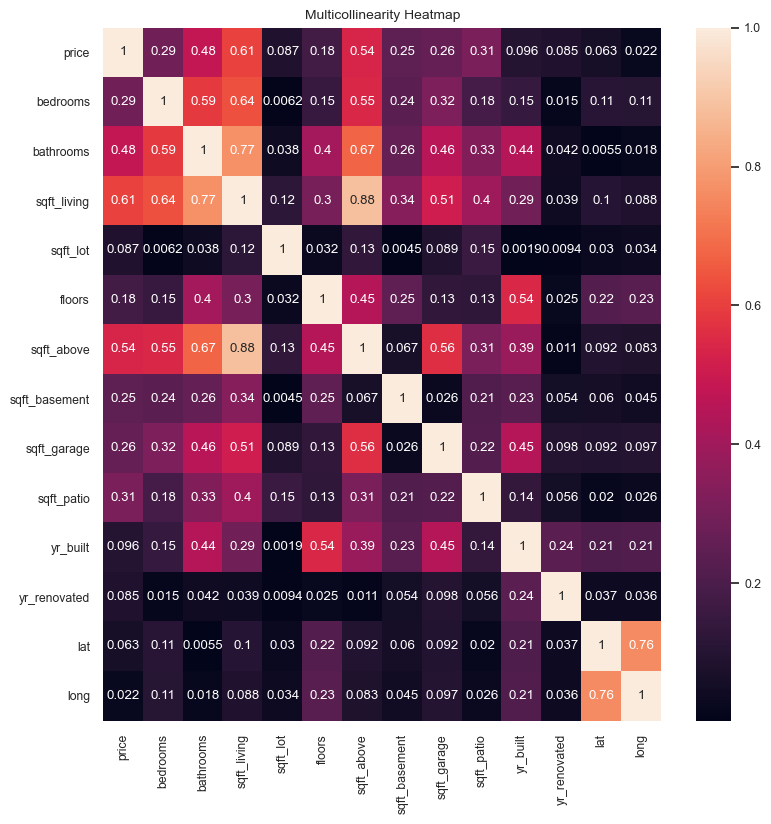

In [22]:
# Creating a heatmap for the numeric variables that exist at this point

plt.figure(figsize=(9,9))
sns.set_theme(font_scale=0.8)
sns.color_palette("flare", as_cmap=True)
sns.heatmap(X_corr, annot=True)
plt.title('Multicollinearity Heatmap', fontsize=10)

Based on the heatmap above and its gradient color scale on the right, the lighter the color, the higher the collinearity is, and the darker the color, the lower the collinearity is. In this case, anything above 0.85 could be considered too highly correlated to each other. For example, in this heatmap, I can see that `sqft_above` and `sqft_living` are too highly correlated to each other at 0.88. However, I can also see that `sqft_living` and `bedrooms` have a high correlation of 0.64, and `sqft_living` is also highly correlated to `bathrooms` which means that those could be very useful features for my model. 

Logically, that also makes sense, because a home with more square footage would have a greater opportunity to have more bedrooms and bathrooms.

### Checking for Linearity

By creating a pair plot, I am able to look at both distribution plots and scatter plots comparing the independent and dependent variables. A distribution plot will show me if there is a skew in the data, and whether or not the data is evenly distrubuted. When looking at a scatter plot, I'd like to see a positive linear relationship.

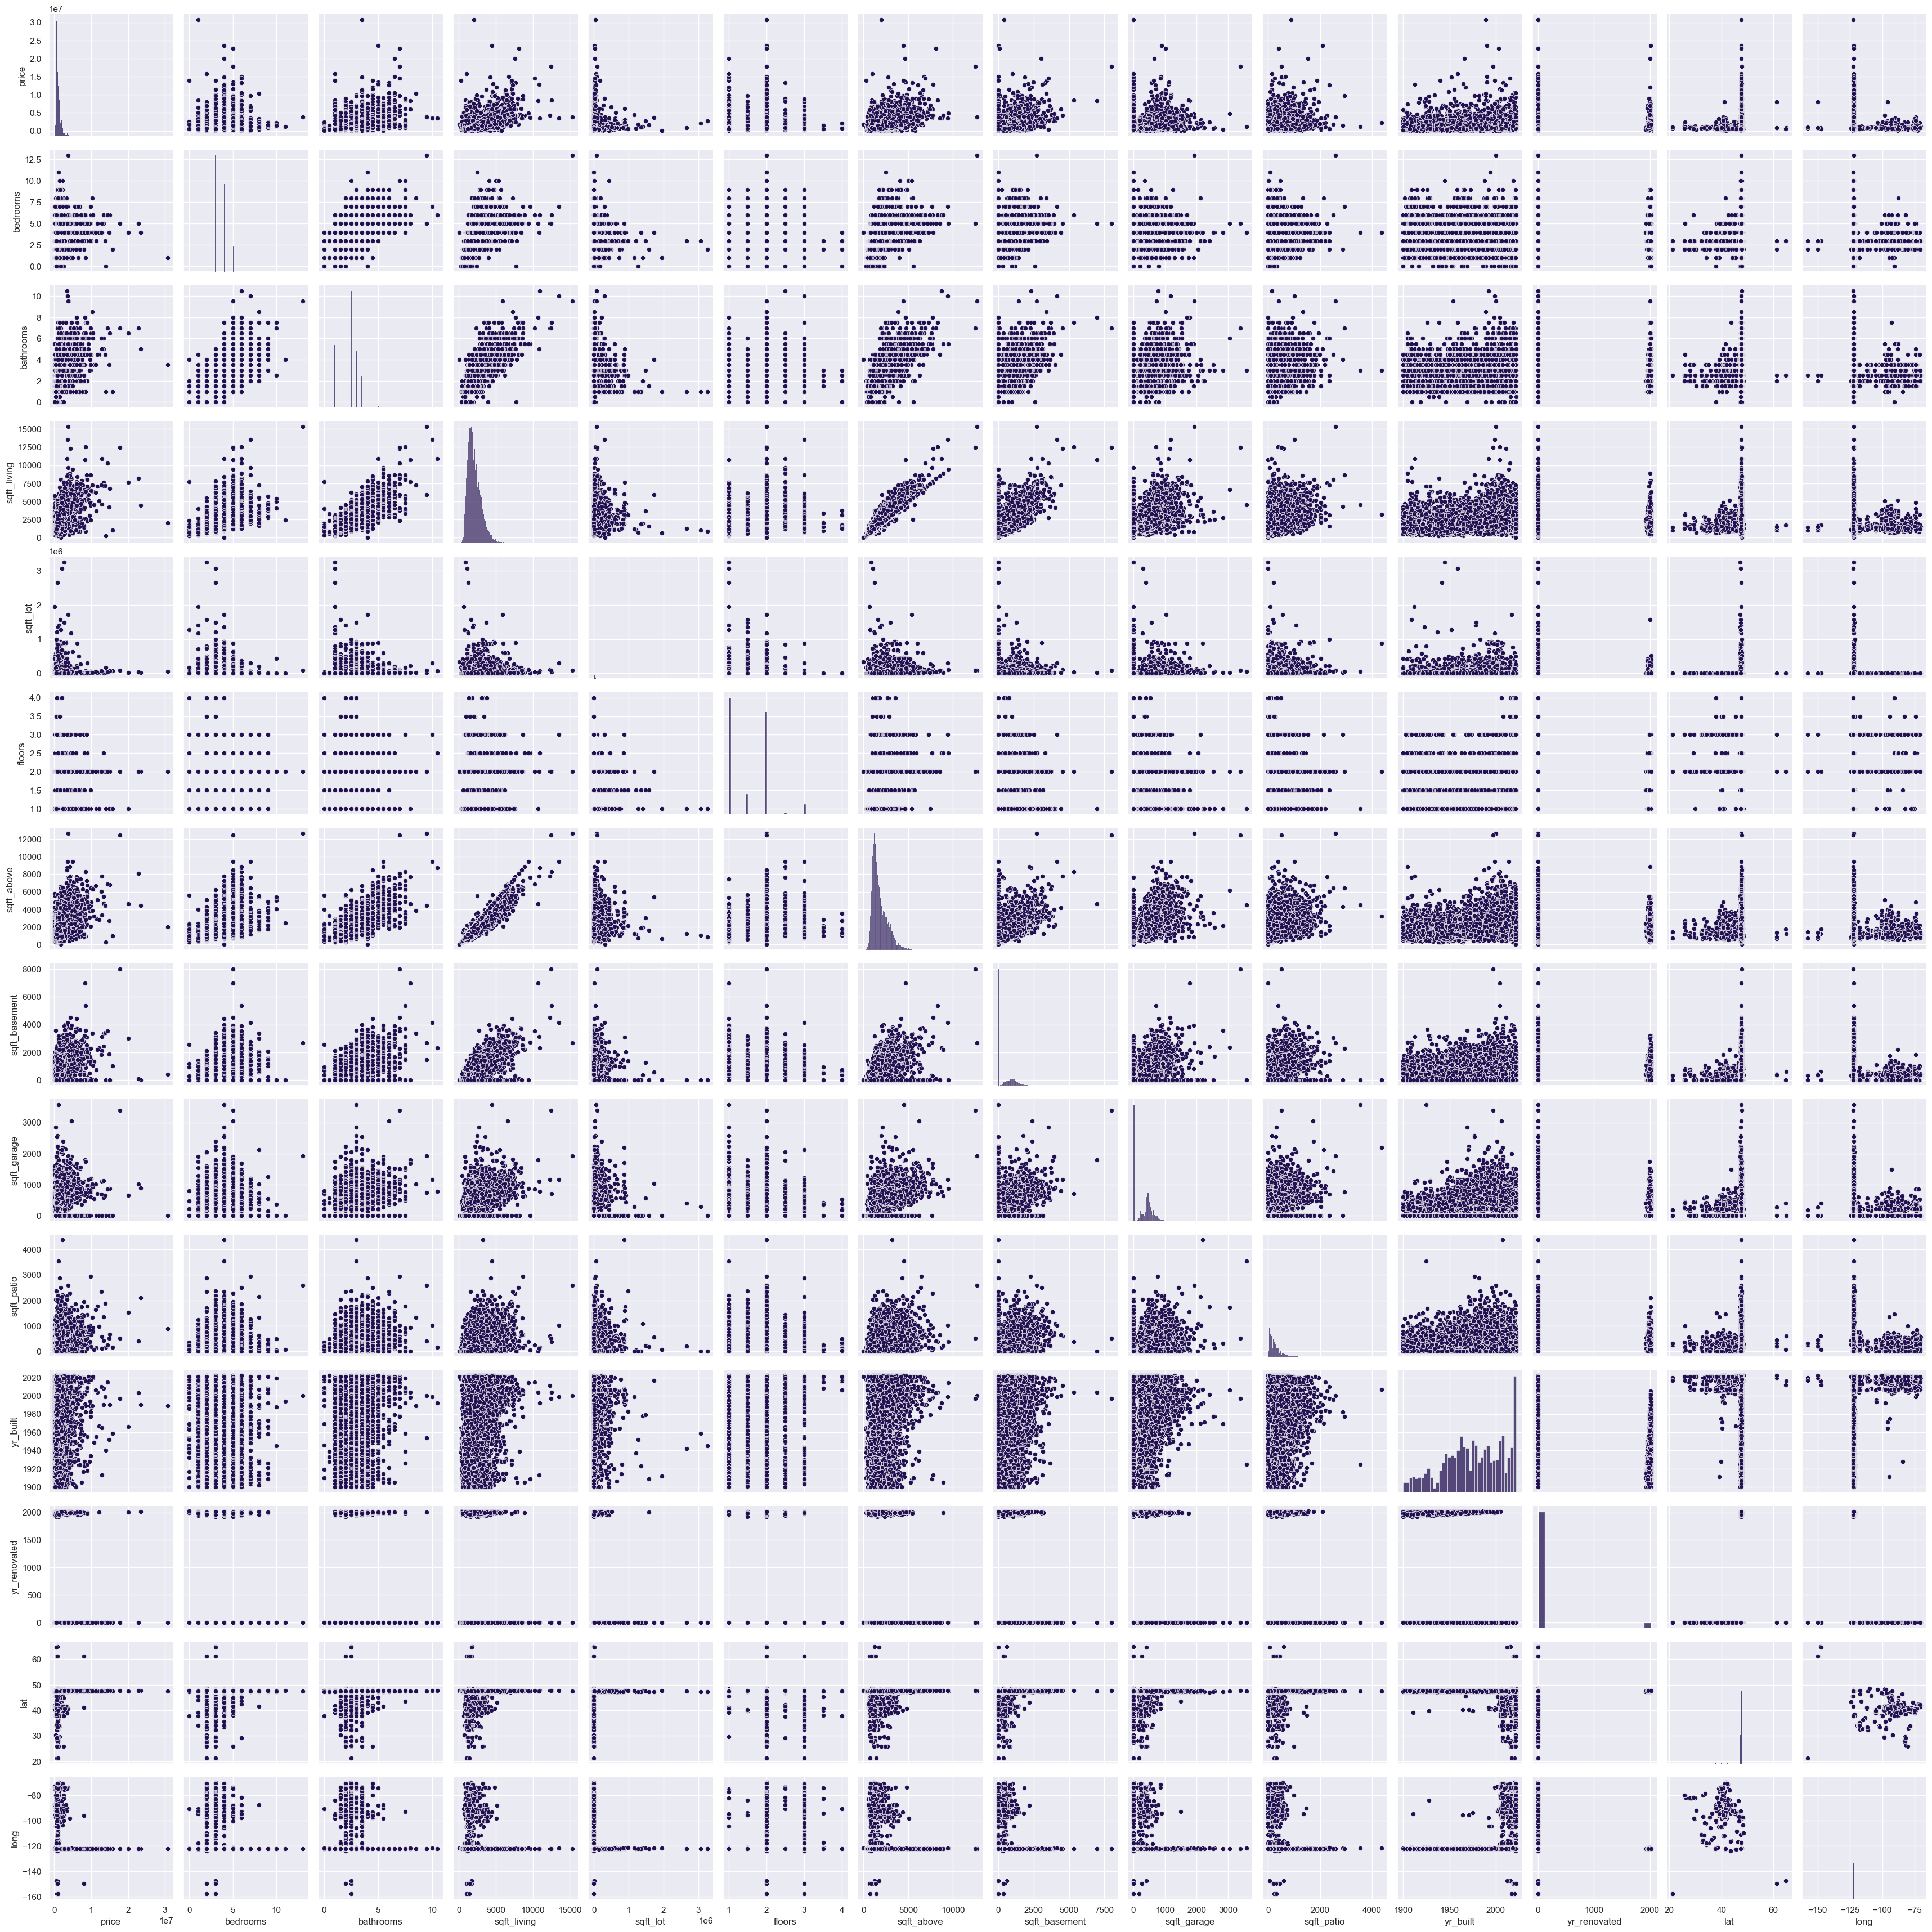

In [23]:
# Creating scatter plots and distribution plots to check for linearity
sns.set_theme(context="notebook", palette="magma", rc={'figure.figsize':(16.8,11.27)})
sns.pairplot(kc)

To compare the distribution plots and scatter plots, I'll start with the dependent variable, price. In the top left corner, the distribution of `price` shows a heavy right skew, which means there are outliers in the variable. In the scatter plots that compare `price` to `sqft_living` or `bathrooms`, I can see that there is a positive linear relationship that exists. The scatter plots that plot `bedrooms` or `floors` looks different because there are a limited amount of X values that could exist since they are usually a whole number.

I can also see that `yr_renovated` and `yr_built` aren't suitable features for the regression model. `Yr_built` doesn't have a strong positive relationship, and `yr_renovated` doesn't either assuming that there are 0 values if the home hasn't been renovated. This is something I could look into more in the future for a different model.

In [24]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Using the `.describe` function gives me information on the standard deviation, which can tell me more specifically about any outliers, and I can also look at the average based on the mean. Like I assumed, I can see that `yr_renovated` has mostly all 0 values, based on the average and the maximum. The average build year for homes in this dataset is 1975, but the year a home is built might not impact price the way we'd expect based on the fluxuation of materials used or style in tha time. 

In [25]:
# Dropping the date, yr_renovated and yr_built 

kc.drop(['date'], axis=1, inplace=True)

In [26]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 7399300360 to 9557800100
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30111 non-null  float64
 1   bedrooms       30111 non-null  int64  
 2   bathrooms      30111 non-null  float64
 3   sqft_living    30111 non-null  int64  
 4   sqft_lot       30111 non-null  int64  
 5   floors         30111 non-null  float64
 6   waterfront     30111 non-null  object 
 7   greenbelt      30111 non-null  object 
 8   nuisance       30111 non-null  object 
 9   view           30111 non-null  object 
 10  condition      30111 non-null  object 
 11  grade          30111 non-null  object 
 12  heat_source    30111 non-null  object 
 13  sewer_system   30111 non-null  object 
 14  sqft_above     30111 non-null  int64  
 15  sqft_basement  30111 non-null  int64  
 16  sqft_garage    30111 non-null  int64  
 17  sqft_patio     30111 non-null  int64

### Preparing Data for Baseline

Building a baseline is important because it is what I will compare the model reiterations to. The goal will be to get a better R-squared, so I know that the models are getting more and more accurate, as well as the MAE and RMSE. In order to create a proper baseline, the first thing I'm going to do is one-hot encode the categorical columns. Later on, I will remove outliers and remove some of the columns based on their P-value. 

#### One-Hot Encoding Categorical Variables

In [27]:
# Creating dummy variables for the object data types

kc = pd.get_dummies(kc, columns=['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 
                                          'grade', 'heat_source', 'sewer_system'], drop_first=True)

In [28]:
# Removing the United States part from the address to get closer to the zip code

kc['address'] = kc['address'].str.replace(', United States', '')

In [29]:
# Checking to see what address looks like now

kc['address']

id
7399300360    2102 Southeast 21st Court, Renton, Washington ...
8910500230    11231 Greenwood Avenue North, Seattle, Washing...
1180000275    8504 South 113th Street, Seattle, Washington 9...
1604601802    4079 Letitia Avenue South, Seattle, Washington...
8562780790    2193 Northwest Talus Drive, Issaquah, Washingt...
                                    ...                        
7834800180    4673 Eastern Avenue North, Seattle, Washington...
194000695     4131 44th Avenue Southwest, Seattle, Washingto...
7960100080    910 Martin Luther King Jr Way, Seattle, Washin...
2781280080    17127 114th Avenue Southeast, Renton, Washingt...
9557800100     18615 7th Avenue South, Burien, Washington 98148
Name: address, Length: 30111, dtype: object

In [30]:
# Creating a variable for zipcode by taking the last five characters from address

kc['zipcode'] = kc['address'].str[-5::]

kc['zipcode']

id
7399300360    98055
8910500230    98133
1180000275    98178
1604601802    98118
8562780790    98027
              ...  
7834800180    98103
194000695     98116
7960100080    98122
2781280080    98055
9557800100    98148
Name: zipcode, Length: 30111, dtype: object

In [31]:
# Checking to see what the data looks like now with zipcode

kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,zipcode
id,,,,,,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,...,0,1,0,0,0,0,0,1,0,98055
8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,...,0,0,0,1,0,0,0,1,0,98133
1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,...,0,1,0,0,0,0,0,1,0,98178
1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,...,0,1,0,0,0,0,0,1,0,98118
8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,...,0,0,0,0,0,0,0,1,0,98027


In [32]:
# Checking again that all of my variables are a numerical datatype

kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 7399300360 to 9557800100
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            30111 non-null  float64
 1   bedrooms                         30111 non-null  int64  
 2   bathrooms                        30111 non-null  float64
 3   sqft_living                      30111 non-null  int64  
 4   sqft_lot                         30111 non-null  int64  
 5   floors                           30111 non-null  float64
 6   sqft_above                       30111 non-null  int64  
 7   sqft_basement                    30111 non-null  int64  
 8   sqft_garage                      30111 non-null  int64  
 9   sqft_patio                       30111 non-null  int64  
 10  yr_built                         30111 non-null  int64  
 11  yr_renovated                     30111 non-null  int64  
 12  addr

In [33]:
# Copying the zipcode column that I will get dummy variables for later

kc['zipcode2'] = kc.loc[:,'zipcode'] 

In [34]:
# Creating dummy variables for the object data types and dropping the first column to avoid the dummy variable trap

kc = pd.get_dummies(kc, columns=['zipcode2'], drop_first=True)

In [35]:
# Dropping original zipcode column

kc = kc.drop(['zipcode'], axis=1)

In [36]:
# Dropping address from the DataFrame because I already have zipcode

kc.drop(['address'], axis=1, inplace=True)

In [37]:
# Creating variables to perform regression analysis

y = kc["price"]
X = sm.add_constant(kc.drop(['price'], axis=1))

In [38]:
# Creating a simple linear regression

model = sm.OLS(y, sm.add_constant(X)).fit()

In [39]:
# Printing results of the model to evaluate model performance

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     143.2
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:21:48   Log-Likelihood:            -4.3824e+05
No. Observations:               30111   AIC:                         8.774e+05
Df Residuals:                   29668   BIC:                         8.811e+05
Df Model:                         442                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Since the *R-squared* of this model is 0.681, I know that this model is accurately predicting about 68% of house prices. However, *Adjusted R-squared* is a more accurate representation and is lower because I have so many variables in this model that might not be statistically significant enough to contribute to the model. However, my *Adjusted R-Squared* likely would have been higher if I hadn't dropped the first column when one-hot encoding. That helped with some multicollinearity, but there is still some that exists in the model. Dropping the first column won't impact the effectiveness of the model, but it may impact the interprability of it.

Now, I'm going to look at what fields I should remove based on their outliers, then I will remove columns based on multicollinearity, and finally I will remove variables with high P-values. Before I go ahead and reiterate this model, I am going to look at the MAE and RMSE of this model so I can compare later on. When I'm happy with the state of my model, I'll also make a few recommendations to stakeholderse based on what I found. 

#### Mean Absolute Errorr (MAE)

In [40]:
# Checking Mean Absolute Error for the first model to set a baseline

residuals = model.resid

# Print residuals 

residuals

id
7399300360    293578.262021
8910500230   -122514.288600
1180000275   -495915.203739
1604601802   -314493.330899
8562780790   -125610.233432
                  ...      
7834800180    387404.104027
194000695      81009.125277
7960100080   -208248.521058
2781280080     55943.912676
9557800100    103458.800601
Length: 30111, dtype: float64

In [41]:
# Return predicted values from model
y_pred = model.fittedvalues

# View predicted values
y_pred

id
7399300360    3.814217e+05
8910500230    1.042514e+06
1180000275    8.069152e+05
1604601802    1.089493e+06
8562780790    7.181102e+05
                  ...     
7834800180    1.167596e+06
194000695     1.231991e+06
7960100080    1.008249e+06
2781280080    7.190561e+05
9557800100    3.965412e+05
Length: 30111, dtype: float64

In [42]:
# True y value

y = kc['price']

In [43]:
# Return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))

# View residuals from model
mae_resid

241389.80805098722

The MAE of a model explains the average error of the model, so in this case the model has an average error of $241,389.81 USD when predicting home prices.

#### Root Mean Squared Error

In [44]:
# Return Root Mean Squared Error
rmse_residuals = np.sqrt(model.mse_resid)

# Print Root Mean Squared Error
rmse_residuals

510282.21467349

The Root Mean Squared Error of a model explains the difference between the true value and the value the model predicts. That being said, this first iteration of the regression model has a RMSE of $510,282.21 USD. Since the RMSE > MAE of this model, this tells me that there are outliers in my dataset which need to be removed. That is expected because it is the first iteration with all variables included.

### Identifying Outliers

Some of the features with outliers that I noticed previously in the DataFrame when I ran `.describe` were `bedrooms` and `sqft_living`. I'm going to look at both visually in different formats, and determine if I should in fact be removing outliers based on the number of bedrooms or the amount of square footage.

In [ ]:
# Creating a boxplot to see how bedrooms impact price

sns.boxplot(x=kc['bedrooms'], y=kc['price'])
plt.title('Price Outliers by Number of Bedrooms', fontsize=10)

Based on this boxplot, I don't need to remove bedroom outliers, because the homes with more than 8 bedrooms actually tend to be lower in price. That might be because the bedrooms are smaller, there aren't as many bathrooms as there are bedrooms (since the maximum of bathrooms was 8), or home buyers simply aren't interested in a home with that many bedrooms. There is one home with only one bedroom that is actually highest in price, which could mean that it's in a great area or potentially the penthouse of a luxury building. 

Text(0.5, 1.0, 'Scatter Plot of Square Footage and Price')

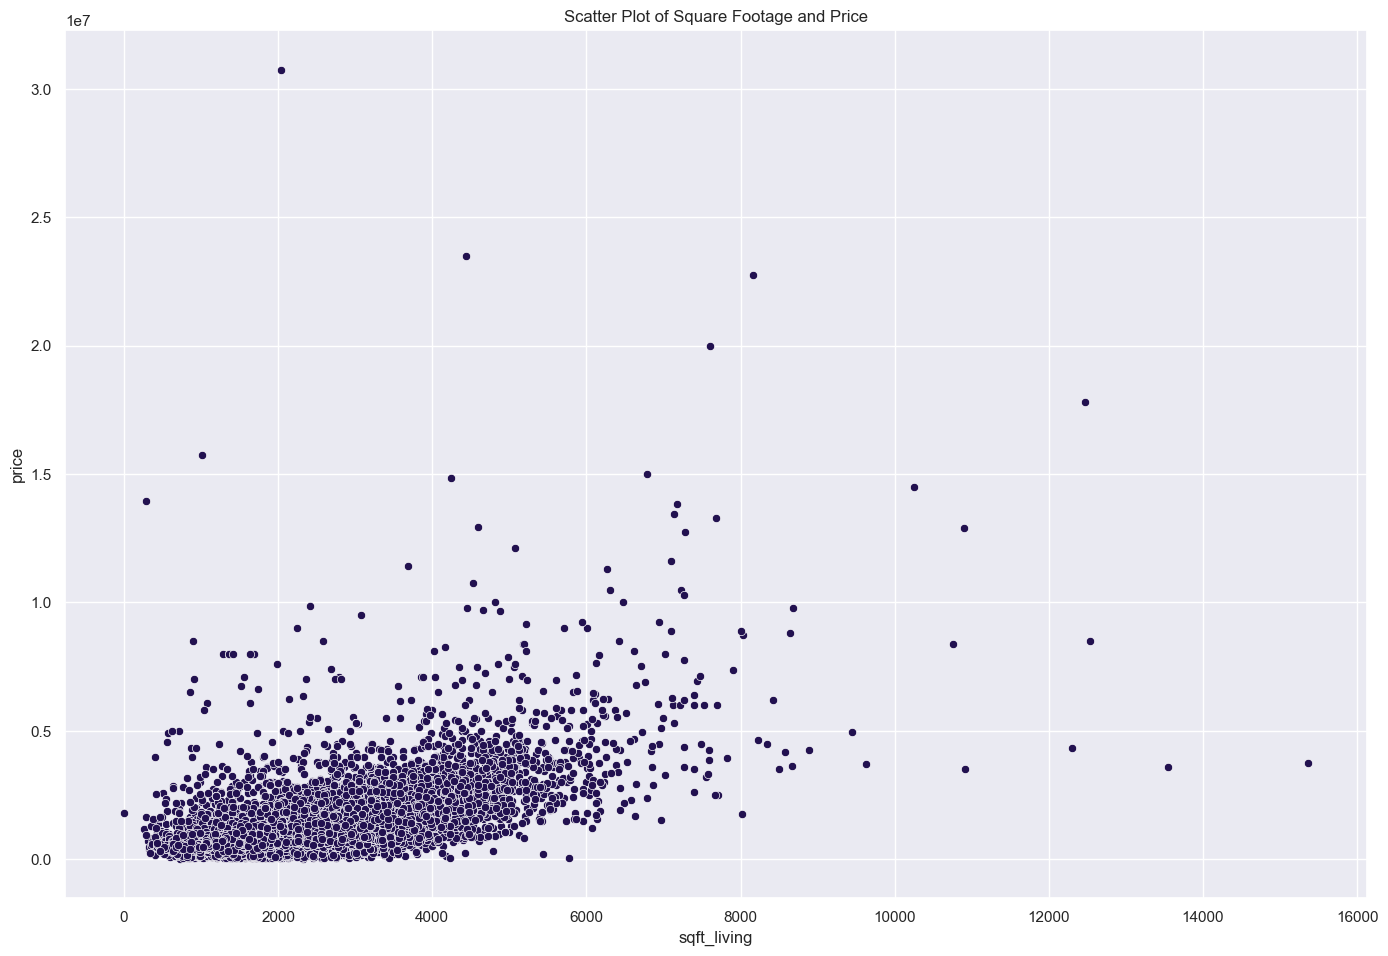

In [47]:
# Creating a boxplot to see how sqft_living impacts price

sns.scatterplot(x=kc['sqft_living'], y=kc['price'])
plt.title('Scatter Plot of Square Footage and Price')

Even though this scatter plot was already graphed in the pairplot, it's nice to take a look at it on it's own for a better view. I can see that there are outliers which have greater square footage, but aren't an outlier for price as well. There is also an outlier which has a lower square footage, but is the highest in price. This might be a highrise apartment in a city, or a home with lots of land. Just because these homes are outliers, doesn't mean they should necessarily be removed from the model.

I am going to create a single density distribution plot for price so I can check if there is a skew in the dataset, and then curate a more normal distribution if needed. 

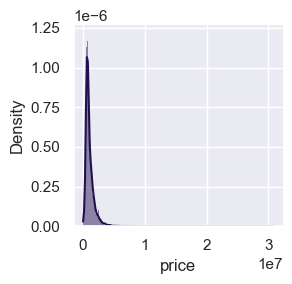

In [48]:
sns.displot(kc['price'], stat="density", height=3, kde=True)

In [49]:
# Checking the original skew before I remove outliers

kc['price'].skew()

6.607690595812311

It's clear that the distribution plot for price has a heavy right skew, so I'm going to remove outliers based on the Interquartile Range (IQR), which means I'll remove the bottom quarter and the top quarter of the dataset. 

In [50]:
# Creating variables for q1 and q3 and creating a variable for IQR

q1 = kc['price'].quantile(0.25)
q3 = kc['price'].quantile(0.75)
IQR = q3-q1
print(IQR)

650764.0


In [51]:
# Creating variables for upper bound and lower bound, which will be the parameters for what I end up excluding

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print(upper_bound)

print(lower_bound)

2276146.0
-326910.0


In [52]:
# Removing upper bound and lower bound from price in kc DataFrame

kc['price'] = kc.loc[kc['price'] < upper_bound, 'price']
kc['price'] = kc.loc[kc['price'] > lower_bound, 'price']

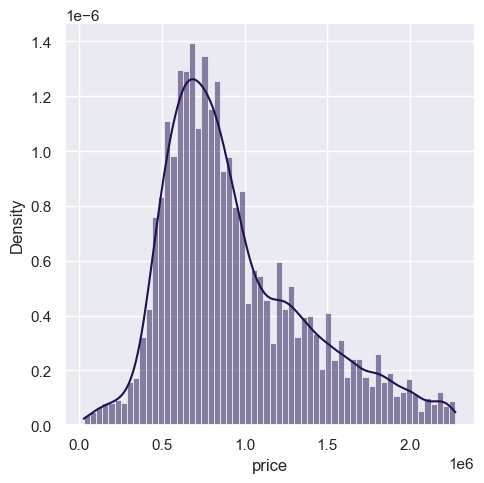

In [53]:
# Plotting the new distribution plot after removing outliers

sns.displot(kc['price'], stat="density", kde=True)

In [54]:
# Checking the skew after I've removed outliers

kc['price'].skew()

0.9043254181296857

The skew decreased from 6.6 to 0.9, and visually, price has a more normal distribution in the plot above, so I'm going to continue onto the next step.

In [55]:
# Checking the shape of the DataFrame after removing price outliers

kc.shape

(30111, 443)

In [56]:
kc.isna().any()

price              True
bedrooms          False
bathrooms         False
sqft_living       False
sqft_lot          False
                  ...  
zipcode2_99403    False
zipcode2_99501    False
zipcode2_99504    False
zipcode2_99701    False
zipcode2_99705    False
Length: 443, dtype: bool

In [57]:
# Dropping any null values that might be in the DataFrame

kc.dropna(inplace=True)

In [58]:
kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,zipcode2_98422,zipcode2_98663,zipcode2_99202,zipcode2_99203,zipcode2_99223,zipcode2_99403,zipcode2_99501,zipcode2_99504,zipcode2_99701,zipcode2_99705
id,,,,,,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,...,0,0,0,0,0,0,0,0,0,0
8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,...,0,0,0,0,0,0,0,0,0,0
1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,...,0,0,0,0,0,0,0,0,0,0
1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,...,0,0,0,0,0,0,0,0,0,0
8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data_pred = kc.iloc[:,1:442]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,zipcode2_98387,zipcode2_98422,zipcode2_98663,zipcode2_99202,zipcode2_99203,zipcode2_99223,zipcode2_99403,zipcode2_99501,zipcode2_99504,zipcode2_99701
id,,,,,,,,,,,,,,,,,,,,,
7399300360,4,1.0,1180,7140,1.0,1180,0,0,40,1969,...,0,0,0,0,0,0,0,0,0,0
8910500230,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,...,0,0,0,0,0,0,0,0,0,0
1180000275,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,...,0,0,0,0,0,0,0,0,0,0
1604601802,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,...,0,0,0,0,0,0,0,0,0,0
8562780790,2,2.0,1120,758,2.0,1120,550,550,30,2012,...,0,0,0,0,0,0,0,0,0,0


In [60]:
multi=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
multi['pairs'] = list(zip(multi.level_0, multi.level_1))

# set index to pairs
multi.set_index(['pairs'], inplace = True)

#d rop level columns
multi.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
multi.columns = ['cc']

# drop duplicates
multi.drop_duplicates(inplace=True)

In [61]:
multi[(multi.cc>.75) & (multi.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.855945
"(lat, long)",0.756660


In this case, I'm going to drop `sqft_above` from the model to avoid multicollinearity, which is included in `sqft_living` anyway. I'm also dropping `lat` and `long` because although it could be useful for plotting high home prices on a map, I won't be using it in my model.

In [62]:
# Dropping the columns

kc.drop(['sqft_above', 'lat', 'long'], axis=1, inplace=True)

In [63]:
# Dropping yr_renovated and yr_built because of what I found earlier in data exploration

kc.drop(['yr_renovated', 'yr_built'], axis=1, inplace=True)

### Reiterating the Model

Now that I've removed outliers, I'm going to create another model, and afterwards I will evaluate the coefficients and drop columns based on the P-values. 

In [64]:
# Creating variables to perform regression analysis

y = kc["price"]
X = sm.add_constant(kc.drop(['price'], axis=1))

# Creating a simple linear regression

model = sm.OLS(y, sm.add_constant(X)).fit()

# Printing results of the model to evaluate model performance

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     161.7
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:22:46   Log-Likelihood:            -3.8755e+05
No. Observations:               28120   AIC:                         7.759e+05
Df Residuals:                   27699   BIC:                         7.794e+05
Df Model:                         420                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Evaluating Regression Summary Coefficients

In this summary, the R-squared represents how well the algorithm is predicting price, and that is high because almost every single field is in the model. The Adj. R-squared is a little lower because there are so many of those predictors in the model. The F-statistic and Prob (F-statistic) should have a great difference between the two, like it does in this regression summary.

The coefficient of each independent variable is what that number would be if the price with all other variables being constant. The std err is the standard deviation for the variable. If the t value associated with the t-test is equal to 0, then the null hypothesis would be accepted. If the t value is not equal to 0, then the null hypothesis can't be accepted.

To determine what I'd like to keep in my model, I'm going to also look at the P-values of the summary. Since my alpha is 0.05, any P-value would mean that I would reject the null hypothesis. Accordingly, anything greater than 0.05 would lead me to fail to reject the null hypothesis because I'm striving for a 95% confidence interval. In this summary, there are a lot of fields with P-values greater than 0.05, so I'm going to remove all of the fields that have a high P-value.

In [65]:
# Removing columns with P-values that are > 0.05

kc.drop(['grade_12 Luxury', 'grade_2 Substandard', 'grade_3 Poor', 'heat_source_Electricity/Solar',
         'heat_source_Oil/Solar', 'heat_source_Other', 'sewer_system_PUBLIC RESTRICTED', 'zipcode2_02066', 
         'zipcode2_02134', 'zipcode2_02149', 'zipcode2_02341', 'zipcode2_02568', 'zipcode2_02645', 'zipcode2_02790', 
         'zipcode2_02852', 'zipcode2_02916', 'zipcode2_07006', 'zipcode2_07031', 'zipcode2_07063', 'zipcode2_07079', 
         'zipcode2_07087', 'zipcode2_07103', 'zipcode2_07107', 'zipcode2_07111', 'zipcode2_07504', 'zipcode2_07513', 
         'zipcode2_07650', 'zipcode2_07712', 'zipcode2_07719', 'zipcode2_08008', 'zipcode2_08054', 'zipcode2_08096', 
         'zipcode2_08204', 'zipcode2_08260', 'zipcode2_08360', 'zipcode2_08520', 'zipcode2_08752', 'zipcode2_10011', 
         'zipcode2_10550', 'zipcode2_11105', 'zipcode2_11106', 'zipcode2_11204', 'zipcode2_11363', 'zipcode2_11369', 
         'zipcode2_11370', 'zipcode2_11373', 'zipcode2_11501', 'zipcode2_11510', 'zipcode2_11703', 'zipcode2_11704',
         'zipcode2_11706', 'zipcode2_11717', 'zipcode2_11731', 'zipcode2_11762', 'zipcode2_11980', 'zipcode2_12546', 
         'zipcode2_13205', 'zipcode2_15010', 'zipcode2_15064', 'zipcode2_15120', 'zipcode2_15301', 'zipcode2_16001',
         'zipcode2_16601', 'zipcode2_17111', 'zipcode2_17702', 'zipcode2_18052', 'zipcode2_18960', 'zipcode2_19104',
         'zipcode2_19129', 'zipcode2_19139', 'zipcode2_19146', 'zipcode2_25177', 'zipcode2_29405', 'zipcode2_32609', 
         'zipcode2_33138', 'zipcode2_33147', 'zipcode2_33619', 'zipcode2_33179', 'zipcode2_34116', 'zipcode2_34208',
         'zipcode2_34601', 'zipcode2_34698', 'zipcode2_43210', 'zipcode2_43211', 'zipcode2_44714', 'zipcode2_45039', 
         'zipcode2_45044', 'zipcode2_45403', 'zipcode2_45659', 'zipcode2_45856', 'zipcode2_46032', 'zipcode2_46151', 
         'zipcode2_46312', 'zipcode2_46554', 'zipcode2_46929', 'zipcode2_47060', 'zipcode2_47265', 'zipcode2_47272', 
         'zipcode2_47546', 'zipcode2_47575', 'zipcode2_47714', 'zipcode2_47805', 'zipcode2_48336', 'zipcode2_48503', 
         'zipcode2_49090', 'zipcode2_49783', 'zipcode2_49858', 'zipcode2_50161', 'zipcode2_50325', 'zipcode2_50644',
         'zipcode2_52040', 'zipcode2_52172', 'zipcode2_52241', 'zipcode2_52405', 'zipcode2_52590', 'zipcode2_52732', 
         'zipcode2_53081', 'zipcode2_53142', 'zipcode2_53213', 'zipcode2_54002', 'zipcode2_54007', 'zipcode2_54736', 
         'zipcode2_54751', 'zipcode2_55021', 'zipcode2_55063', 'zipcode2_55112', 'zipcode2_55117', 
         'zipcode2_55356'], axis=1, inplace=True)

In [66]:
# Removing columns wih P-values that are > 0.05
# Broken out into two blocks of code for appearance

kc.drop(['zipcode2_55379', 'zipcode2_55382', 'zipcode2_55404', 'zipcode2_55406', 'zipcode2_55407', 
        'zipcode2_55411', 'zipcode2_55412', 'zipcode2_55417', 'zipcode2_55734', 'zipcode2_55901', 'zipcode2_55929', 
        'zipcode2_56303', 'zipcode2_56387', 'zipcode2_56472', 'zipcode2_56537', 'zipcode2_56549', 'zipcode2_58018', 
        'zipcode2_58042', 'zipcode2_58059', 'zipcode2_58102', 'zipcode2_58104', 'zipcode2_58203', 'zipcode2_58261', 
        'zipcode2_58270', 'zipcode2_58503', 'zipcode2_59102', 'zipcode2_59405', 'zipcode2_59501', 'zipcode2_60088', 
        'zipcode2_60155', 'zipcode2_61104', 'zipcode2_61108', 'zipcode2_61201', 'zipcode2_61244', 'zipcode2_61264', 
        'zipcode2_61933', 'zipcode2_62204', 'zipcode2_62205', 'zipcode2_62281', 'zipcode2_62401', 'zipcode2_62703', 
        'zipcode2_62859', 'zipcode2_62896', 'zipcode2_63014', 'zipcode2_63090', 'zipcode2_63301', 'zipcode2_63601', 
        'zipcode2_63624', 'zipcode2_63640', 'zipcode2_63653', 'zipcode2_64116', 'zipcode2_64119', 'zipcode2_64124', 
        'zipcode2_64156', 'zipcode2_64503', 'zipcode2_64641', 'zipcode2_66102', 'zipcode2_66104', 'zipcode2_66109', 
        'zipcode2_66503', 'zipcode2_67801', 'zipcode2_67846', 'zipcode2_68031', 'zipcode2_68048', 'zipcode2_68106', 
        'zipcode2_68132', 'zipcode2_68133', 'zipcode2_68307', 'zipcode2_68347', 'zipcode2_68354', 'zipcode2_68410', 
        'zipcode2_68455', 'zipcode2_68502', 'zipcode2_68504', 'zipcode2_68628', 'zipcode2_68632', 'zipcode2_68643', 
        'zipcode2_68651', 'zipcode2_68652', 'zipcode2_68660', 'zipcode2_68788', 'zipcode2_68826', 'zipcode2_68862', 
        'zipcode2_68970', 'zipcode2_68972', 'zipcode2_69154', 'zipcode2_72751', 'zipcode2_73064', 'zipcode2_73118', 
        'zipcode2_75050', 'zipcode2_76205', 'zipcode2_78216', 'zipcode2_78257', 'zipcode2_79339', 'zipcode2_79423',  
        'zipcode2_80210', 'zipcode2_80238', 'zipcode2_80401', 'zipcode2_80501', 'zipcode2_80904', 'zipcode2_83687', 
        'zipcode2_83712', 'zipcode2_84104', 'zipcode2_84115', 'zipcode2_84790', 'zipcode2_85040', 'zipcode2_85207', 
        'zipcode2_85210', 'zipcode2_85295', 'zipcode2_85705', 'zipcode2_87507', 'zipcode2_89108', 'zipcode2_90063', 
        'zipcode2_90605', 'zipcode2_91343', 'zipcode2_91730', 'zipcode2_91910', 'zipcode2_92250', 'zipcode2_92879', 
        'zipcode2_93041', 'zipcode2_94122', 'zipcode2_94403', 'zipcode2_94530', 'zipcode2_94607', 'zipcode2_95205', 
        'zipcode2_95240', 'zipcode2_95822', 'zipcode2_96816', 'zipcode2_97006', 
        'zipcode2_97210'], axis=1, inplace=True)

In [67]:
# Dropping more columns based on their P-values

kc.drop(['zipcode2_97214', 'zipcode2_97214', 'zipcode2_97221', 'zipcode2_97459', 'zipcode2_98005', 'zipcode2_98006',
        'zipcode2_98007', 'zipcode2_98008', 'zipcode2_98011', 'zipcode2_98024', 'zipcode2_98027', 'zipcode2_98028',
        'zipcode2_98029', 'zipcode2_98033', 'zipcode2_98034', 'zipcode2_98040', 'zipcode2_98050', 'zipcode2_98052',
        'zipcode2_98053', 'zipcode2_98065', 'zipcode2_98072', 'zipcode2_98074', 'zipcode2_98075', 'zipcode2_98077',
        'zipcode2_98102', 'zipcode2_98103', 'zipcode2_98105', 'zipcode2_98107', 'zipcode2_98109', 'zipcode2_98112', 
        'zipcode2_98115', 'zipcode2_98116', 'zipcode2_98117', 'zipcode2_98118', 'zipcode2_98119', 'zipcode2_98122',
        'zipcode2_98125', 'zipcode2_98126', 'zipcode2_98133', 'zipcode2_98136', 'zipcode2_98144', 'zipcode2_98155',
        'zipcode2_98177', 'zipcode2_98199', 'zipcode2_98223', 'zipcode2_98270', 'zipcode2_98271', 'zipcode2_98272', 
        'zipcode2_98338', 'zipcode2_98372', 'zipcode2_98387', 'zipcode2_98663', 'zipcode2_99202', 'zipcode2_99203', 
        'zipcode2_99223', 'zipcode2_99403', 'zipcode2_99501', 'zipcode2_99504', 'zipcode2_99701', 
         'zipcode2_99705'], axis=1, inplace=True)

In [68]:
# Seeing how many less columns there are in the DataFrame

kc.shape

(28120, 121)

#### Reiterating the Model

In [69]:
# Creating variables to perform regression analysis

y = kc["price"]
X = sm.add_constant(kc.drop(['price'], axis=1))

# Creating a simple linear regression

model = sm.OLS(y, sm.add_constant(X)).fit()

# Printing results of the model to evaluate model performance

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     466.2
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:22:56   Log-Likelihood:            -3.8993e+05
No. Observations:               28120   AIC:                         7.801e+05
Df Residuals:                   28004   BIC:                         7.810e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Removing the P-values from the previous model decreased the R-squared slightly, but it also lessened the difference between the R-squared and Adjusted R-squared. Now, I will continue removing features based on the P-values of the model's summary.

In [70]:
# Dropping more of the columns that have a P-value > 0.05

kc.drop(['condition_Fair', 'zipcode2_11215', 'zipcode2_11360', 'zipcode2_15223', 'zipcode2_50237', 'zipcode2_56027',
        'zipcode2_56560', 'zipcode2_58212', 'zipcode2_58490', 'zipcode2_85296', 'zipcode2_93523', 'zipcode2_98296'], 
        axis=1, inplace=True)

In [71]:
# Creating variables to perform regression analysis

y = kc["price"]
X = sm.add_constant(kc.drop(['price'], axis=1))

# Creating a simple linear regression

model = sm.OLS(y, sm.add_constant(X)).fit()

# Printing results of the model to evaluate model performance

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     496.0
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:22:56   Log-Likelihood:            -3.8994e+05
No. Observations:               28120   AIC:                         7.801e+05
Df Residuals:                   28011   BIC:                         7.810e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

For the final regression model, I have an R-squared of 0.657, and an Adj. R-squared of 0.655. That being said, there may be some overfitting in this model but not a concerning amount. There is also still a significant difference between the F-statistic and the Prob (F-statistic). In addition, all of the features in this model have a statistically significant P-value.

None of the t values are equal to 0, which means that for each feature, the null hypothesis will be accepted. As a reminder, the null hypothesis is that this model has no relationship with predicting home prices. The alternative hypothesis is that this model *does* have an ability to predict home prices, and the features in this model have a relationship with price.

Features with negative coefficients will have a negative impact on price, and features with positive coefficients will have a greater positive impact on price. For example, bedrooms and bathrooms will have a positive impact on price.

#### Mean Absolute Error (MAE)

In [72]:
# Checking Mean Absolute Error for the first model to set a baseline

residuals = model.resid

# Print residuals 

residuals

id
7399300360    158733.654403
8910500230   -275218.828328
1180000275   -595063.161912
1604601802   -569537.091847
8562780790   -132691.295943
                  ...      
7834800180    424837.220363
194000695     146982.752047
7960100080   -114932.961896
2781280080     -2311.656111
9557800100     41325.173138
Length: 28120, dtype: float64

In [73]:
# Return predicted values from model
y_pred = model.fittedvalues

# View predicted values
y_pred

id
7399300360    5.162663e+05
8910500230    1.195219e+06
1180000275    9.060632e+05
1604601802    1.344537e+06
8562780790    7.251913e+05
                  ...     
7834800180    1.130163e+06
194000695     1.166017e+06
7960100080    9.149330e+05
2781280080    7.773117e+05
9557800100    4.586748e+05
Length: 28120, dtype: float64

In [74]:
# True y value

y = kc['price']

In [75]:
# Return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))

# View residuals from model
mae_resid

182660.91164697584

The MAE of a model explains the average error of the model, so in this case the model has an average error of \\$169,097.32 USD which is \\$75,578.25 less than the original MAE of \\$241,389.81 USD when predicting home prices.

#### Root Mean Squared Error

In [76]:
# Return Root Mean Squared Error
rmse_residuals = np.sqrt(model.mse_resid)

# Print Root Mean Squared Error
rmse_residuals

255218.3624023049

The Root Mean Squared Error of a model explains the difference between the true value and the value the model predicts. The new RMSE of \\$236,752.92 USD which is 53.6 percent less than the original RMSE of \\$510,282.21 USD. Still, the RMSE > MAE of this model as well, so if I were to continue iterating through this model I could look for more outliers. 

### Evaluating Linear Assumptions

#### Homoscedasticity

/Users/deannagould/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


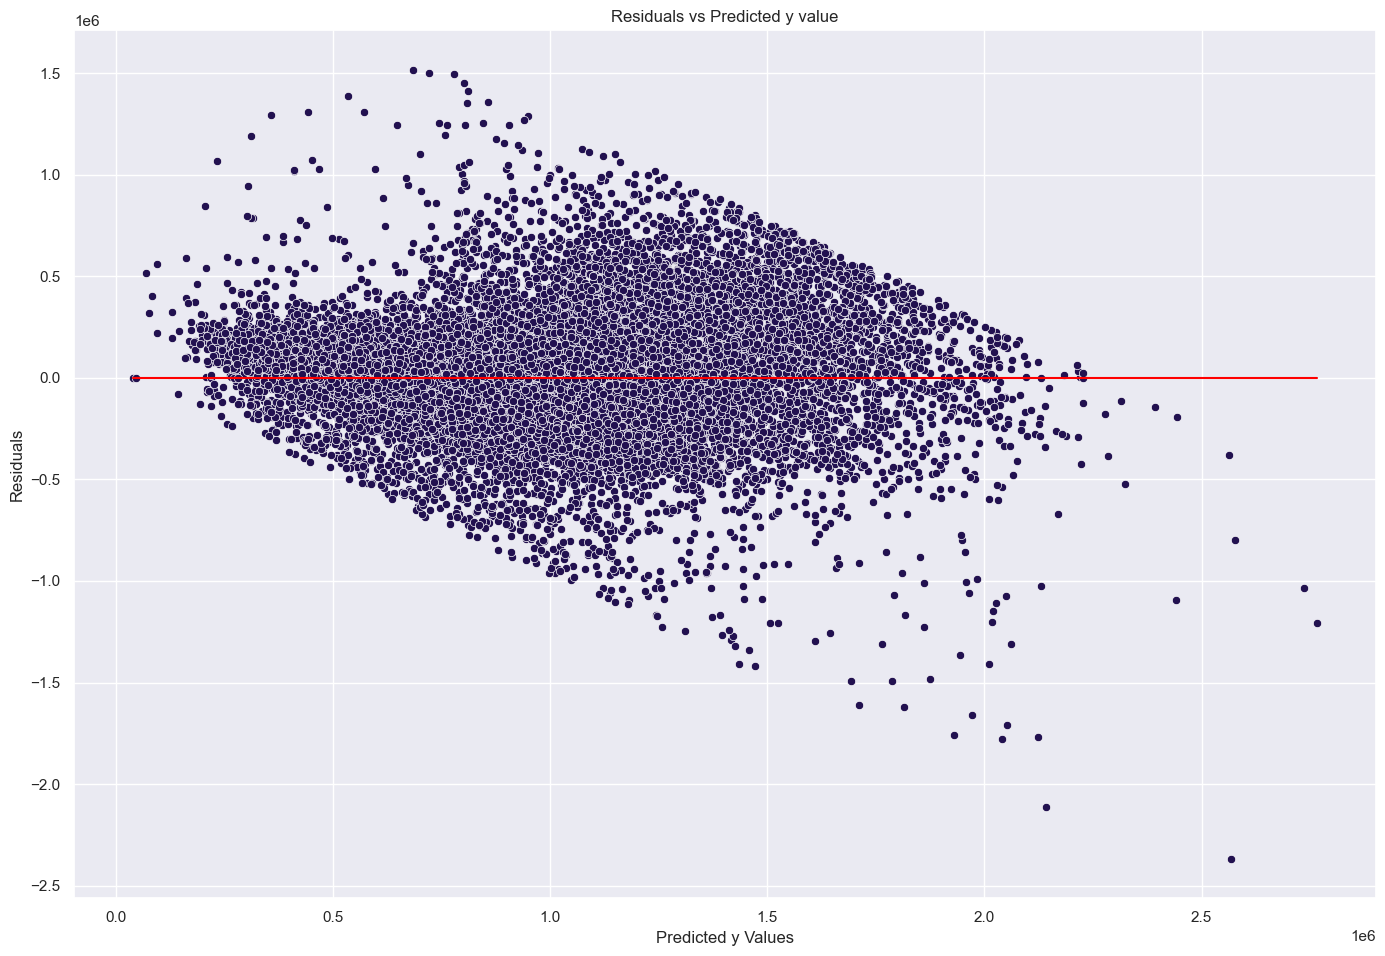

In [77]:
p = sns.scatterplot(data=kc, x=y_pred, y=residuals)
plt.xlabel('Predicted y Values')
plt.ylabel('Residuals')
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='red')
p = plt.title('Residuals vs Predicted y value')

The model is appearing to pass the homoscedasticity test, but the plots aren't in the middle of the graph. This should improve after outliers are removed.

#### Normality

/Users/deannagould/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


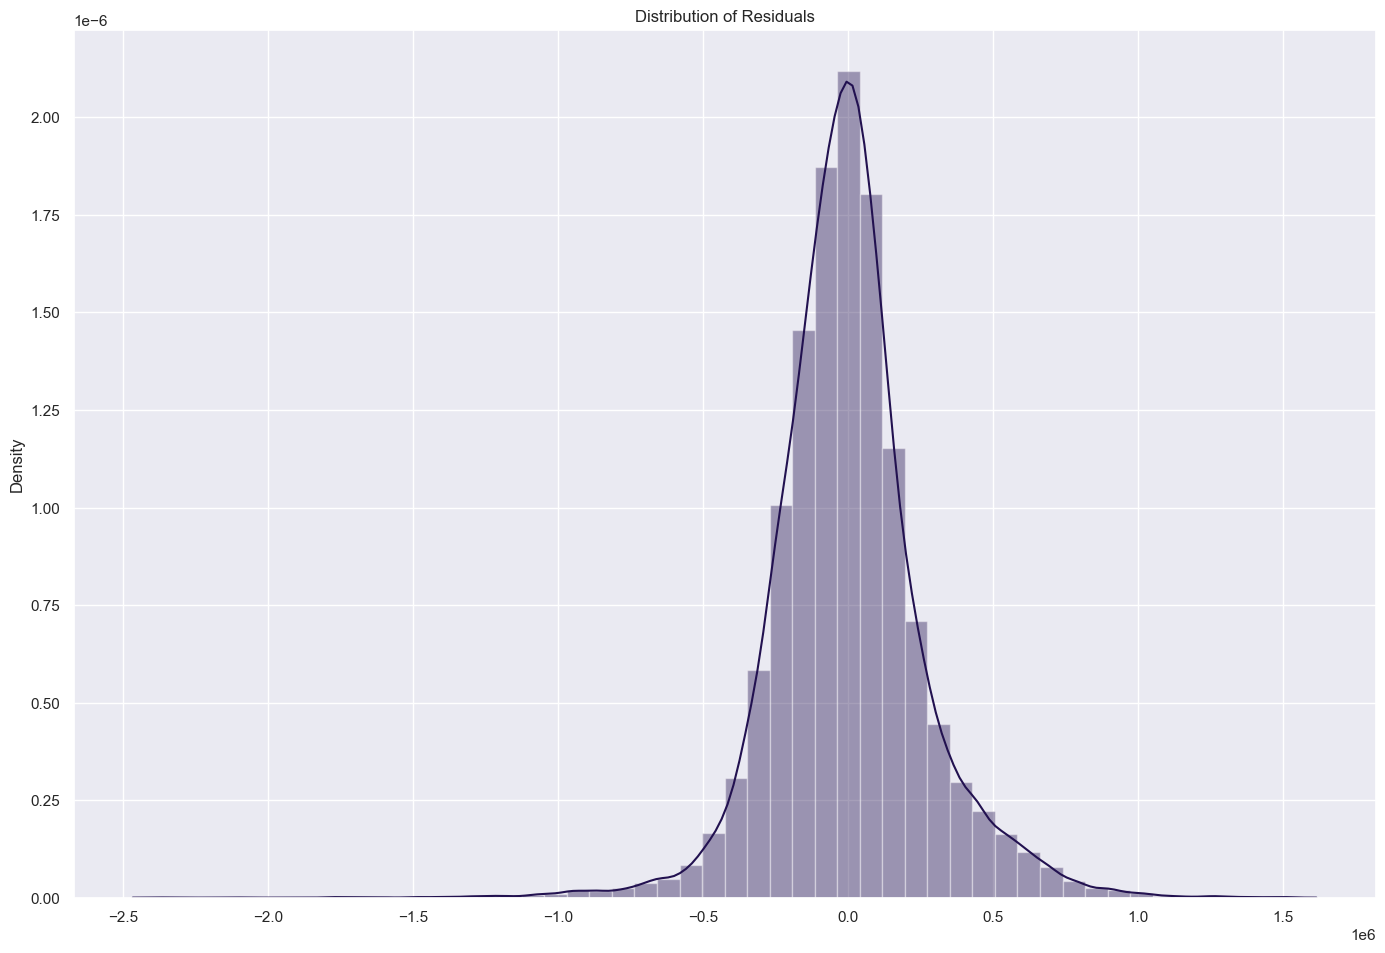

In [78]:
# check for normality among the residuals
sns.set_figsize=(4,4)
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of Residuals')

### Stakehholder Recommendations

In [79]:
'''
The coefficient of a feature may be interpreted differently based on the column that was dropped, (Morgan sent article)
May still need to include interpretation of linear regression assumption
-Homoscedactity, normality (distribution), linearity (scatter plot)
'''

'\nThe coefficient of a feature may be interpreted differently based on the column that was dropped, (Morgan sent article)\nMay still need to include interpretation of linear regression assumption\n-Homoscedactity, normality (distribution), linearity (scatter plot)\n'

This regression model passes the four assumptions of linear regression which are linearity, normality, homoscedacity, and multicollinearity. The model passed the linearity assumption in the beginning of this Jupyter notebook which was discussed earlier on. Earlier in this notebook I also checked for multicollinearity with a heatmap, as well as by using the stack method and removed columns which were too multicollinear. At the end of the regression model, I checked to see if my residualas were homoscedastic. Based on the visual shown, I can see that there is a pattern, however I would expect the plotting of the residuals to be trending upwards instead of downwards as price (y) increases. This is something that I could continue to work on by trying things like a log transformation, or by using the train test split method. In the last visual shown of a distribution plot, I can see that the distribution of the residuals is a normal distribution with a slight left skew, but I am happy with the results. 

Based on the final model regression summary, there are a few main points that the real estate investment firm should focus on when buying and remodeling homes. For starters, the firm should consider the condition of a home. A home in very good condition will have a higher selling price than a home in good condition, which has a significantly higher selling price than conditions below that. This will also likely make it easier for contractors and vendors to renovate the home, and sell the home faster than those in poor condition. 

Aside from the condition of the home, as well as the size of the home, the number of bedrooms a home has can determine the price. In addition to that, another contributing factor is he amount of bathrooms a home has. Typically, a home buyer will want a similar amount of bathrooms as there are bedrooms, so if more bedrooms are created, it would also be important to create new bathrooms as well. 

If I have more time in the future to work on this project, I would determine which areas in King County have the highest sell price based on zip code, and I would create map of areas that the firm should target based on how long the firm is comfortable holding onto a home and renovating it. 